***Data Science Internship Program***
===================================

>**Industry-Cognifyz Technologies<br>
Name-Hari Om**

***Level 3***
===

***Task 1 : Predictive Modeling:-***<br>
-Build a regression model to predict the aggregate rating of a restaurant based on available features.<br>
-Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.<br>
-Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.


***Task 2: Customer Preference Analysis:-***<br>
-Analyze the relationship between the type of cuisine and the restaurant's rating.<br>
-Identify the most popular cuisines among customers based on the number of votes.<br>
-Determine if there are any specific cuisines that tend to receive higher ratings.

***Task 3: Data Visualization:-***<br>
-Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).<br>
-Compare the average ratings of different cuisines or cities using appropriate visualizations.<br>
-Visualize the relationship between various features and the target variable to gain insights.

<BR>

***Level 3***
===
***Task 1 : Predictive Modeling :-***<br>
***------------------------------------***

In [94]:
#import libraries import
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns;sns. set(color_codes=True)
%matplotlib inline
from shapely. geometry import Point
import geopandas as gpd
import geopandas as gdpdf
import folium as folium
from folium. plugins import MarkerCluster
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [95]:
# Load the dataset

data_set= pd.read_csv('C:/Users/hari9/Downloads/Dataset  (1).csv')

In [96]:
#1.Build a regression model to predict the aggregate rating of a restaurant based on available features.


# Creating new features for the length of restaurant name and address
data_set['Name Length'] = data_set['Restaurant Name'].apply(len)
data_set['Address Length'] = data_set['Address'].apply(len)

# One-hot encoding for 'Has Table booking' and 'Has Online delivery' using pandas
f = pd.get_dummies(data_set, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

# Correctly identify the columns in f after one-hot encoding
X = f[['Average Cost for two', 'Votes', 'Price range', 'Name Length', 'Address Length','Has Table booking_Yes', 'Has Online delivery_Yes']]
y = f['Aggregate rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("""Model:LinearRegression:-
-------------------------""")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")




Model:LinearRegression:-
-------------------------
Mean Squared Error: 1.6775321117485154
R-squared: 0.26298252021735546


In [97]:
#2.Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance

# Identify numeric and categorical columns
numeric_features = ['Average Cost for two', 'Votes', 'Price range', 'Name Length', 'Address Length']
categorical_features = ['Country Code', 'Has Table booking', 'Has Online delivery', 'Rating color', 'Rating text']

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

# Define the models
models = {'Linear Regression': LinearRegression(),'Decision Tree': DecisionTreeRegressor(),'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)}

# Split the data into training and testing sets
X = data_set.drop('Aggregate rating', axis=1)
y = data_set['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(model_name, model):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}, R-squared: {r2}")

# Evaluate each model
for model_name, model in models.items():
    evaluate_model(model_name, model)



Linear Regression - Mean Squared Error: 0.03146282405002271, R-squared: 0.986176925540923
Decision Tree - Mean Squared Error: 0.05918628990057561, R-squared: 0.9739967241671814
Random Forest - Mean Squared Error: 0.031413576340593906, R-squared: 0.9861985623384746


***Task 2:Customer Preference Analysis :-***<br>
***---------------------------------------------***

C:\Users\hari9\AppData\Local\Temp\ipykernel_17476\3010694356.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cuisines', y='Aggregate rating', data=filtered_data, palette='viridis')


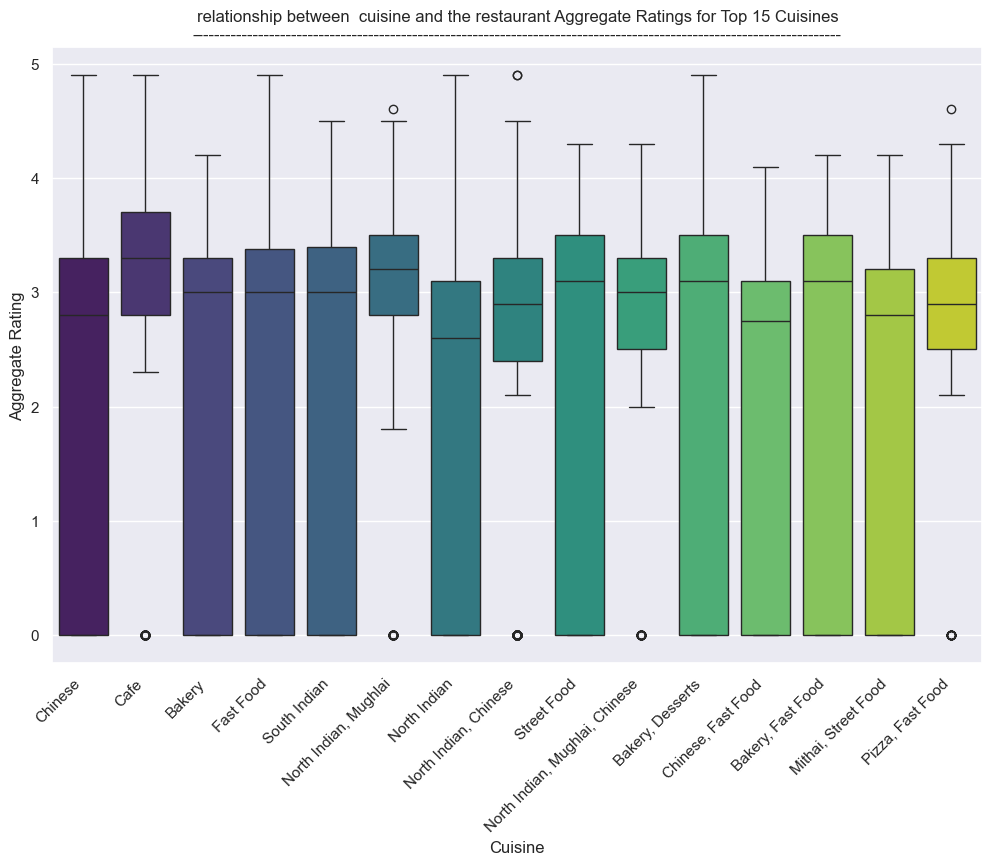

In [98]:

# # 1. Analyze the relationship between the type of cuisine and the restaurant's rating.


# Extract the top 15 cuisines by the number of occurrences
top_cuisines = data_set['Cuisines'].value_counts().head(15).index

# Filter the data for the top 15 cuisines
filtered_data = data_set[data_set['Cuisines'].isin(top_cuisines)]

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=filtered_data, palette='viridis')
plt.title("""relationship between  cuisine and the restaurant Aggregate Ratings for Top 15 Cuisines
----------------------------------------------------------------------------------------------------------------------""")
plt.xlabel('Cuisine')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45, ha='right')
plt.show()



Cuisines
North Indian, Mughlai                         53747
North Indian                                  46241
North Indian, Chinese                         42012
Cafe                                          30657
Chinese                                       21925
North Indian, Mughlai, Chinese                20115
Fast Food                                     17852
South Indian                                  16433
Mughlai, North Indian                         15275
Italian                                       14799
European, Mediterranean, North Indian         12541
Modern Indian                                 12355
Chinese, Thai                                 12354
Pizza                                         11537
Continental, American, Asian, North Indian    11404
Name: Votes, dtype: int64


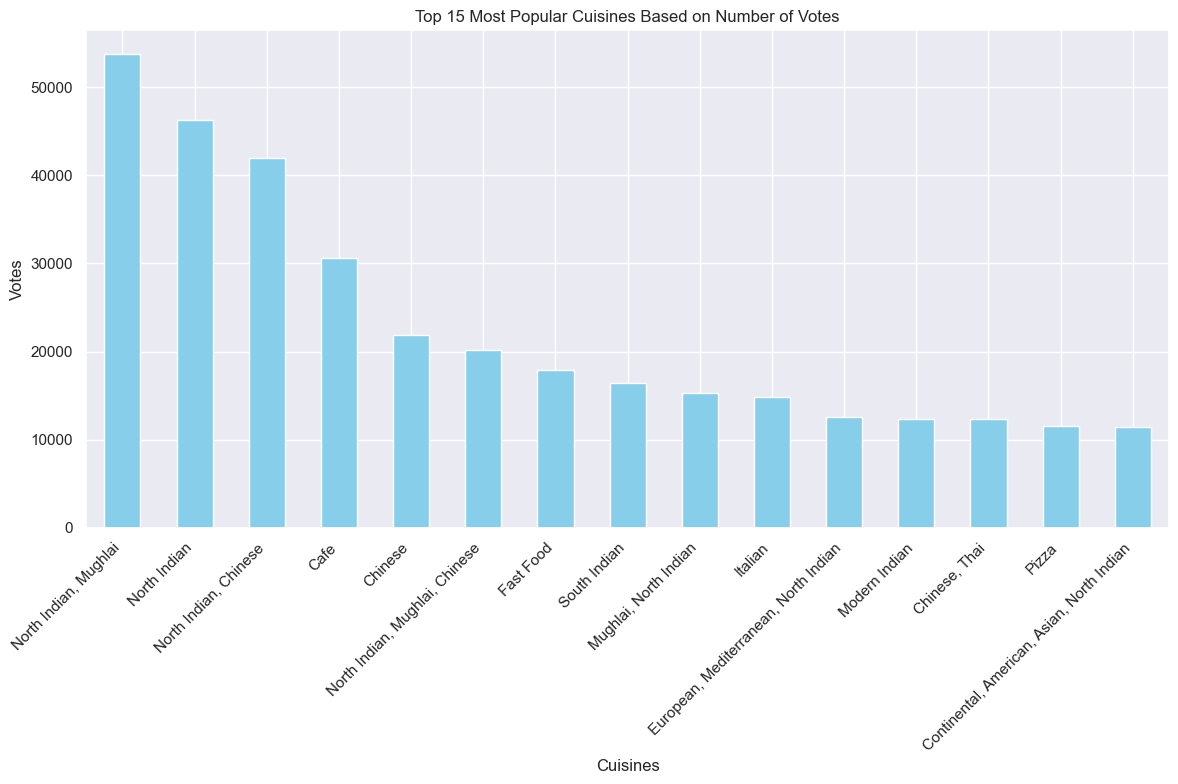

In [99]:
#2.Identify the most popular cuisines among customers based on the number of votes.



# Aggregate the total number of votes for each cuisine
cuisine_votes = data_set.groupby('Cuisines')['Votes'].sum()

# Sort the cuisines by total votes in descending order
popular_cuisines = cuisine_votes.sort_values(ascending=False)

# Display the top cuisines and their total votes
print(popular_cuisines.head(15))


# Plot the top 15 most popular cuisines based on the number of votes
plt.figure(figsize=(12, 8))
popular_cuisines.head(15).plot(kind='bar', color='skyblue')
plt.title('Top 15 Most Popular Cuisines Based on Number of Votes')
plt.xlabel('Cuisines')
plt.ylabel('Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Cuisines
Italian, Deli                      4.9
Hawaiian, Seafood                  4.9
American, Sandwich, Tea            4.9
Continental, Indian                4.9
European, Asian, Indian            4.9
European, Contemporary             4.9
European, German                   4.9
BBQ, Breakfast, Southern           4.9
American, Coffee and Tea           4.9
Sunda, Indonesian                  4.9
American, Burger, Grill            4.9
Mughlai, Lucknowi                  4.9
Mexican, American, Healthy Food    4.9
American, Caribbean, Seafood       4.9
Burger, Bar Food, Steak            4.9
Name: Aggregate rating, dtype: float64


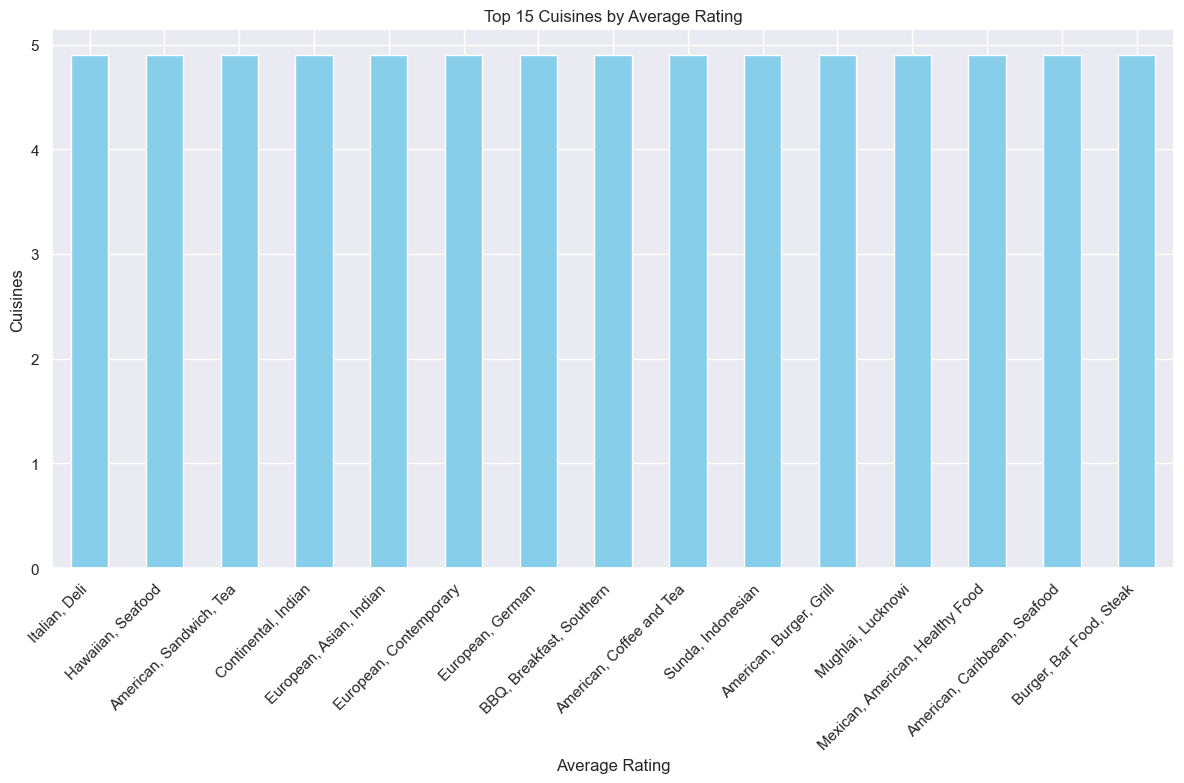

In [100]:
#3.Determine if there are any specific cuisines that tend to receive higher ratings.

# Group the data by 'Cuisines' and calculate the average rating for each cuisine
cuisine_avg_rating = data_set.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Display the top cuisines by average rating
top_cuisines_by_rating = cuisine_avg_rating.head(15)
print(top_cuisines_by_rating)

# Plot the top 10 cuisines by average rating
plt.figure(figsize=(12, 8))
top_cuisines_by_rating.plot(kind='bar', color='skyblue')
plt.title('Top 15 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisines')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


***Task 3: Data Visualization :-***<br>
***---------------------------------***

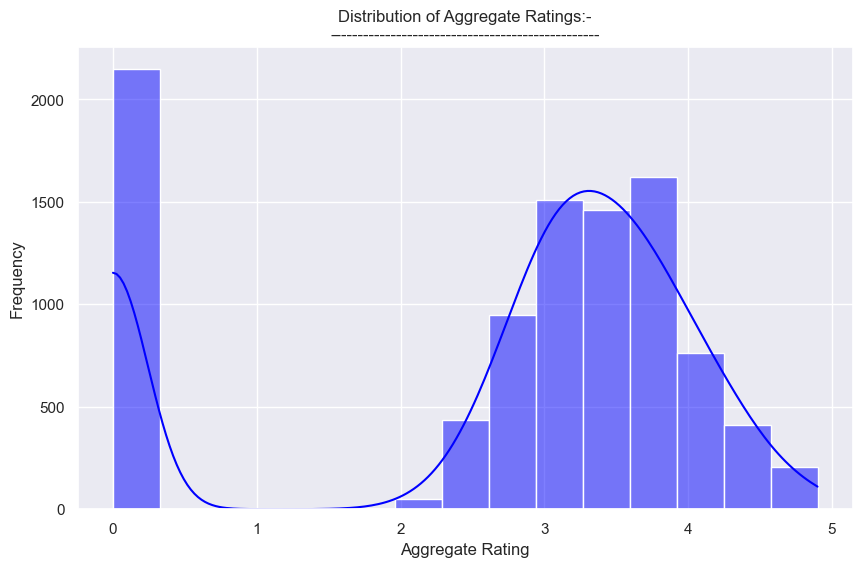

C:\Users\hari9\AppData\Local\Temp\ipykernel_17476\891724066.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Aggregate rating', data=data_set, palette='viridis')


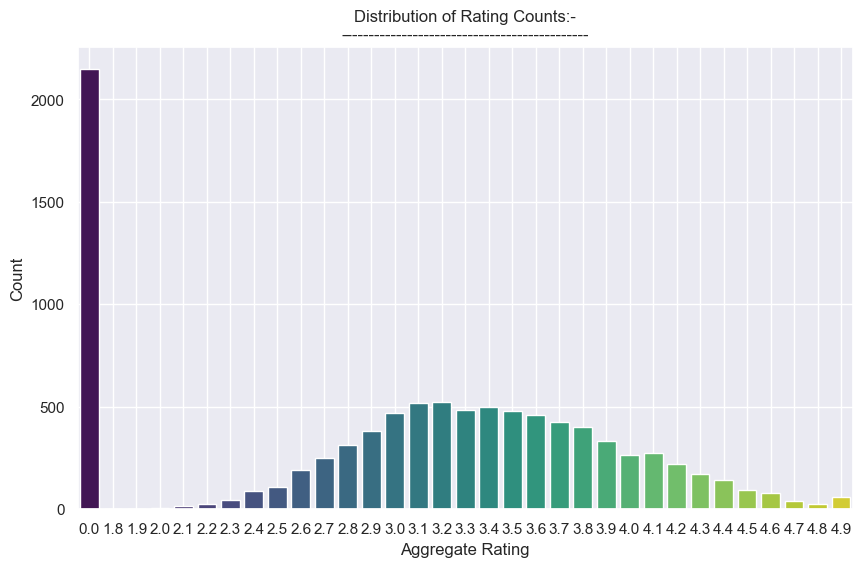

C:\Users\hari9\AppData\Local\Temp\ipykernel_17476\891724066.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Aggregate rating', data=data_set, palette='muted')


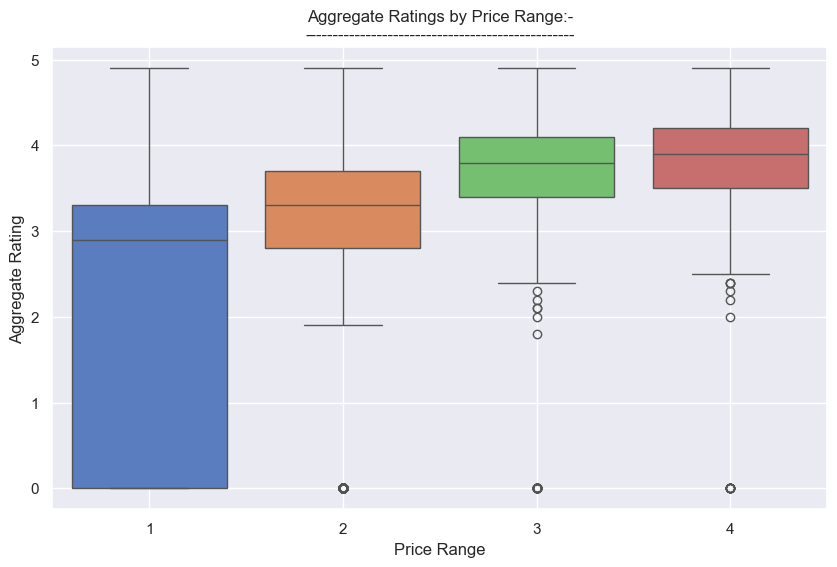

In [101]:
# 1.Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.)

# Histogram of Aggregate Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data_set['Aggregate rating'], bins=15, kde=True, color='blue')
plt.title("""Distribution of Aggregate Ratings:-
-------------------------------------------------""")
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# Bar Plot of Rating Counts
plt.figure(figsize=(10, 6))
sns.countplot(x='Aggregate rating', data=data_set, palette='viridis')
plt.title("""Distribution of Rating Counts:-
---------------------------------------------""")
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()
# Box Plot of Aggregate Ratings by Price Range
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=data_set, palette='muted')
plt.title("""Aggregate Ratings by Price Range:-
-------------------------------------------------""")
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()


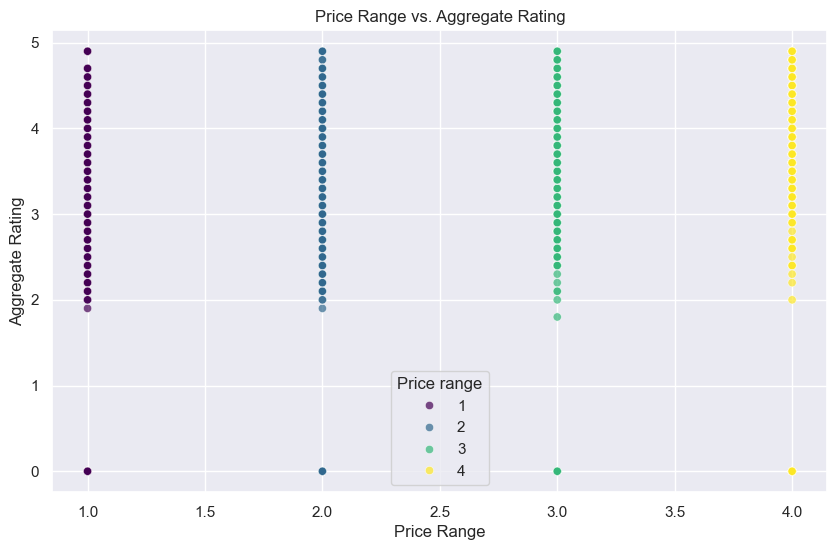

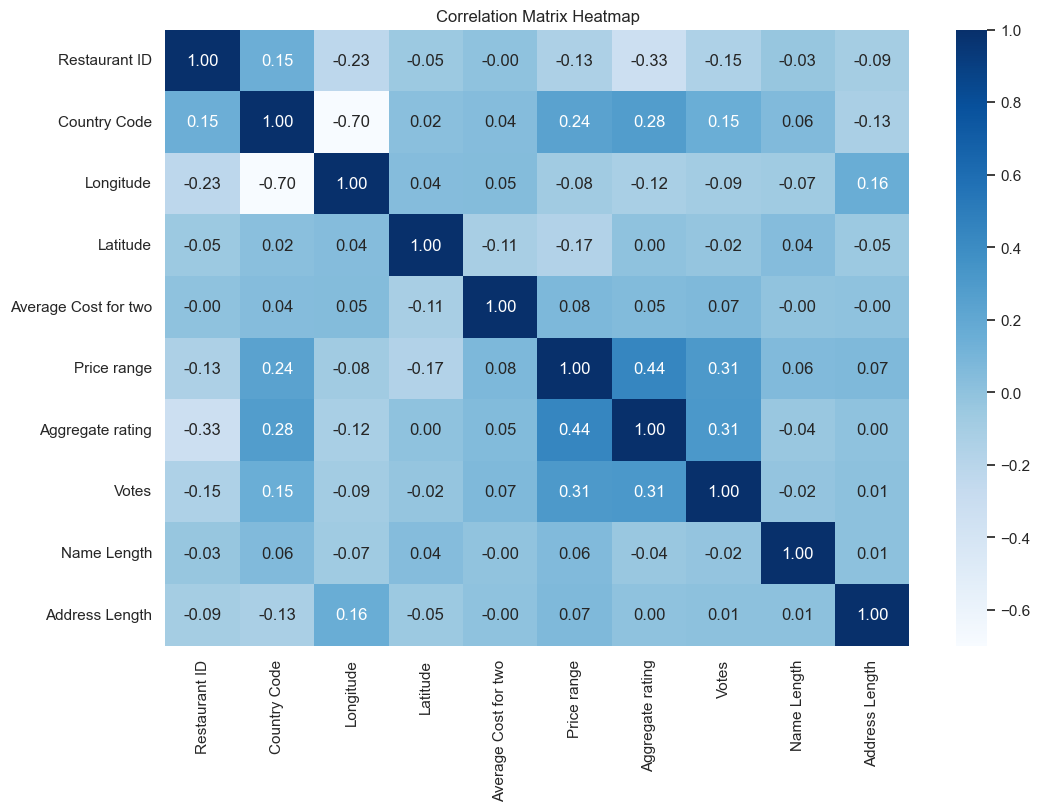

In [102]:
# 2.Visualize the relationship between various features and the target variable to gain insights.



# Scatter plot of Price Range vs. Aggregate Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price range', y='Aggregate rating', data=data_set, hue='Price range', palette='viridis', alpha=0.7)
plt.title('Price Range vs. Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()


# Select only the numerical columns for the correlation matrix
numerical_columns = data_set.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = data_set[numerical_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()

